In [1]:
import urllib.request, urllib.error, urllib.parse

url = 'https://www.wunderground.com/history/monthly/us/ca/orange/date/2021-2'

response = urllib.request.urlopen(url)
content = response.read().decode('UTF-8')

print(content[:500])

<!DOCTYPE html><html lang="en" itemscope="" itemtype="http://schema.org/Organization" prefix="og: http://ogp.me/ns#"><head itemscope="" itemtype="http://schema.org/WebSite">
  <meta charset="utf-8">
  <title>Orange, CA Weather History | Weather Underground</title>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
  <link rel="dns-prefetch" href="//widgets.outbrain.com">
  <link rel="dns-prefetch" href="//odb.ou


In [2]:
if "Daily Observations" in content:
    index = content.index("Daily Observations")
    print(content[index-100:index+500])

334="" _nghost-sc212=""><div _ngcontent-sc212=""><div _ngcontent-sc212="" class="observation-title">Daily Observations</div> No Data Recorded <!----><!----></div></lib-city-history-observation></div></div><div _ngcontent-sc334="" class="row is-sidebar ng-star-inserted"><div _ngcontent-sc334="" class="region-sidebar"><ad-wx-bot-300 _ngcontent-sc334="" libsticky=""><div id="wx-bot-300-browser" class="ad-wrap ad-desktop"><div id="WX_Bot300"></div></div></ad-wx-bot-300></div></div><!----></div></div><div _ngcontent-sc334="" class="region-footer ng-star-inserted"><ad-taboola _ngcontent-sc334="" typ


In [3]:
content

'<!DOCTYPE html><html lang="en" itemscope="" itemtype="http://schema.org/Organization" prefix="og: http://ogp.me/ns#"><head itemscope="" itemtype="http://schema.org/WebSite">\n  <meta charset="utf-8">\n  <title>Orange, CA Weather History | Weather Underground</title>\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n  <link rel="dns-prefetch" href="//widgets.outbrain.com">\n  <link rel="dns-prefetch" href="//odb.outbrain.com">\n  <link rel="dns-prefetch" href="//c.amazon-adsystem.com">\n  <link rel="dns-prefetch" href="//s.amazon-adsystem.com">\n  <link rel="dns-prefetch" href="//aax.amazon-adsystem.com">\n  <link rel="dns-prefetch" href="//partner.googleadservices.com">\n  <link rel="dns-prefetch" href="//tpc.googlesyndication.com">\n  <link rel="dns-prefetch" href="//pagead2.googlesyndication.com">\n  <link rel="dns-prefetch" href="//h.nexac.com">\n  <link rel="dns-prefetch" href="//js-sec.indexw

### No Dynamic Data! ###

[Stackoverflow #1](https://stackoverflow.com/questions/14516590/how-to-save-complete-webpage-not-just-basic-html-using-python)
[Stackoverflow #2](https://stackoverflow.com/questions/13854274/is-it-possible-to-get-complete-source-code-of-a-website-including-css-by-just-pr/13855315#13855315)

Or, if it's just going to be a few pages, use your web browser and choose to save complete webpage

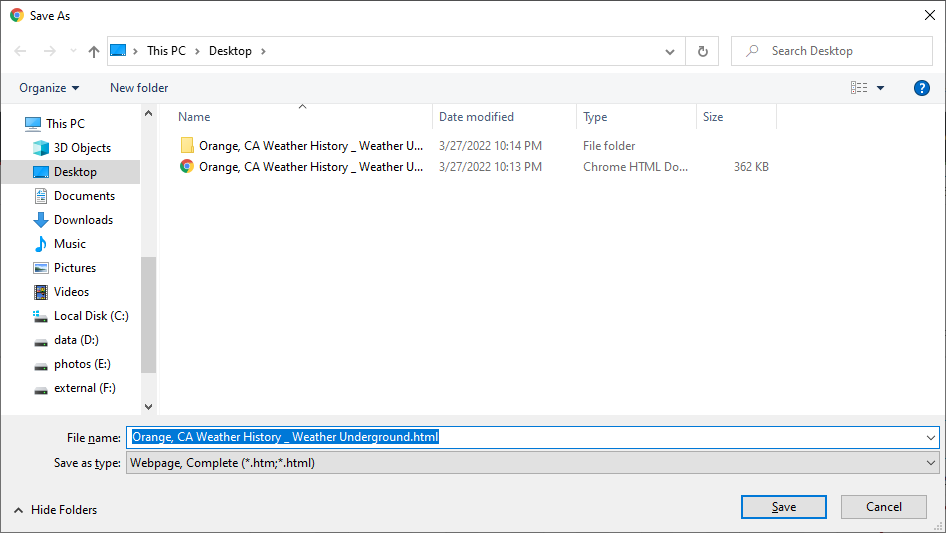

In [22]:
filename = 'Orange, CA Weather History _ Weather Underground.html'
with open(filename, 'r', encoding='utf8') as fin:
    contents = fin.read()
    
print(contents[:500])

<!DOCTYPE html>
<!-- saved from url=(0069)https://www.wunderground.com/history/monthly/us/ca/orange/date/2024-1 -->
<html lang="en" itemscope="" itemtype="http://schema.org/Organization" prefix="og: http://ogp.me/ns#" dir="ltr"><head itemscope="" itemtype="http://schema.org/WebSite"><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
  
  <title>Orange, CA Weather History | Weather Underground</title>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta 


In [23]:
import re

pattern = "<td _ngcontent-app-root-c196=\"\" class=\"ng-star-inserted\"> (?P<value>[\d\.]+) <\/td>"

result = re.findall(pattern, contents)
print(result)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '67', '57.6', '51', '65', '57.4', '49', '63', '57.3', '54', '64', '54.3', '46', '65', '55.2', '46', '64', '54.7', '45', '61', '56.0', '49', '64', '52.6', '41', '61', '51.8', '43', '61', '55.4', '47', '62', '56.5', '49', '63', '53.2', '44', '62', '53.7', '45', '61', '54.1', '48', '63', '54.5', '47', '66', '53.4', '48', '61', '58.7', '56', '65', '59.9', '56', '68', '59.5', '53', '62', '59.1', '58', '65', '60.6', '59', '62', '59.6', '58', '66', '59.1', '55', '63', '58.7', '54', '64', '59.6', '54', '74', '59.2', '50', '77', '64.6', '51', '75', '64.3', '54', '79', '65.0', '54', '72', '61.5', '52', '66', '57.5', '53', '50', '45.0', '40', '54', '48.5', '40', '52', '47.1', '37', '43', '39.2', '37', '50', '42.3', '37', '52', '44.7', '38', '51', '27.6', '15', '33', '22.9', '10', '42', '34.2', '24', '48', '44.0', '38', '4

In [29]:
for month_length in [28, 29, 30, 31]:
    if len(result) // month_length == len(result) / month_length:
        print(f"This data is likely for a {month_length} days long month")

This data is likely for a 31 days long month


In [31]:
import numpy as np
import pandas as pd

headings = ['Day', 'Temp Max', 'Temp Avg', 'Temp Min', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
            'Humidity Max', 'Humidity Avg', 'Humidity Min', 'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
            'Pressure Max', 'Pressure Avg', 'Pressure Min', 'Precip (in)']

month_lengths = [28, 29, 30, 31]
for total_days in month_lengths:
    if len(result) / total_days == len(result) // total_days:
        print(f"This month is {total_days} days long")
        data = np.array(result)
        data = np.reshape(data, (17, total_days))
        data = pd.DataFrame(data.T, columns=headings).set_index('Day')
        break
        
data

This month is 31 days long


,Temp Max,Temp Avg,Temp Min,Dew Point Max,Dew Point Avg,Dew Point Min,Humidity Max,Humidity Avg,Humidity Min,Wind Speed Max,Wind Speed Avg,Wind Speed Min,Pressure Max,Pressure Avg,Pressure Min,Precip (in)
Day,,,,,,,,,,,,,,,,
1,67,56.5,59,50,36.7,53,93,50.3,65,9,5.0,0,30.1,29.9,29.8,0.11
2,57.6,49,62,45.0,26,57,65.7,26,90,1.6,0,10,30.0,29.8,29.8,0.00
3,51,63,59.6,40,44,55.3,37,68,85.9,0,8,4.9,30.0,30.2,29.7,0.00
4,65,53.2,58,54,36.1,53,84,53.5,78,9,3.2,0,30.2,30.1,29.6,0.19
5,57.4,44,66,48.5,30,55,72.8,35,93,2.4,0,10,30.1,30.0,30.0,0.00
6,49,62,59.1,40,48,53.5,56,80,82.3,0,8,2.5,30.1,30.1,29.8,0.00
7,63,53.7,55,52,40.5,51,90,62.2,60,10,2.5,0,30.1,30.0,29.8,0.01
8,57.3,45,63,47.1,35,53,70.5,41,84,4.1,0,9,30.0,30.0,30.1,0.00
9,54,61,58.7,37,48,51.4,46,80,77.0,0,7,3.5,29.9,30.0,30.1,0.00


In [ ]:
# https://www.regular-expressions.info/catastrophic.html

In [ ]:
https://www.reddit.com/r/webdev/comments/8tjavu/now_that_the_free_wunderground_api_has_been/

In [ ]:
https://medium.com/@imdipto/best-free-alternatives-to-the-wunderground-weather-api-21acb22450e6

In [ ]:
https://raygun.com/blog/soap-vs-rest-vs-json/

In [ ]:
https://regex101.com/

In [ ]:
https://www.programiz.com/python-programming/regex#python-regex
https://stackoverflow.com/questions/4697882/how-can-i-find-all-matches-to-a-regular-expression-in-python


In [ ]:
https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

In [ ]:
import requests
page = requests.get("https://dataquestio.github.io/web-scraping-pages/simple.html")
page.status_code

In [ ]:
page.content

In [65]:
from bs4 import BeautifulSoup

In [66]:
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
list(soup.children)

In [ ]:
for child in soup.children:
    print(f"'{child}'")
    print()

In [ ]:
[type(item) for item in list(soup.children)]

In [74]:
html = list(soup.children)[2]

In [ ]:
list(html.children)

In [76]:
body = list(html.children)[3]

In [ ]:
list(body.children)

In [ ]:
p = list(body.children)[1]
p.get_text()

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
soup.find_all('p')

In [ ]:
results = soup.find_all('p')
for p in results:
    print(p.get_text())

In [ ]:
# https://stackoverflow.com/questions/13074586/extracting-selected-columns-from-a-table-using-beautifulsoup
# see also https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

filename = 'Orange, CA Weather History _ Weather Underground.htm'
with open(filename, 'r') as fin:
    contents = fin.read()

soup = BeautifulSoup(contents, 'html.parser')


for row in soup.findAll('table')[0].tbody.findAll('tr'):
    first_column = row.findAll('th')[0].contents
    third_column = row.findAll('td')[2].contents
    print(first_column, third_column)

In [111]:
summary = soup.select('table[aria-labelledby="History summary"]')

In [116]:
month = soup.select('table[aria-labelledby="History days"]')

In [ ]:
days = soup.select('table[aria-labelledby="Days data"]')
for row in days[2].find_all('tr'):
    for col in row.find_all('td'):
        print(col.contents)
    print()

In [ ]:
for d in days:
    for row in d.find_all('tr'):
        cols = [c.contents[0].strip() for c in row.find_all('td')]
        print(cols)
    print()

In [ ]:
data = []
for d in days:
    for row in d.find_all('tr'):
        for col in row.find_all('td'):
            value = col.contents[0].strip()
            try:
                data.append(float(value))
            except:
                continue

headings = ['Day', 'Temp Max', 'Temp Avg', 'Temp Min', 'Dew Point Max', 'Dew Point Avg', 'Dew Point Min',
            'Humidity Max', 'Humidity Avg', 'Humidity Min', 'Wind Speed Max', 'Wind Speed Avg', 'Wind Speed Min',
            'Pressure Max', 'Pressure Avg', 'Pressure Min', 'Precipitation (in)']

month_lengths = [28, 29, 30, 31]
for total_days in month_lengths:
    
    if len(result) / total_days == len(result) // total_days:
        print(f"This month is {total_days} days long")
        data = np.array(result)
        data = np.reshape(data, (17, total_days))
        data = pd.DataFrame(data.T, columns=headings).set_index('Day')
        break
        
data